In [70]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #Libreria para regresion logistica
from sklearn.linear_model import LinearRegression # Libreria para regresion Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
ruta = r'D:\PERSONAL\UNIVERSIDAD\INGENIERIA DE SISTEMAS\2024\2024-1\ÁNALISIS DE DATOS\TAREA 5\Titanic-Dataset.csv'

In [72]:
print (ruta)


D:\PERSONAL\UNIVERSIDAD\INGENIERIA DE SISTEMAS\2024\2024-1\ÁNALISIS DE DATOS\TAREA 5\Titanic-Dataset.csv


In [73]:
datos = pd.read_csv(ruta)

In [74]:
valores_vacios_por_columna = datos.isna().sum()
print("Número de registros vacios por columna:")
print(valores_vacios_por_columna)

Número de registros vacios por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Encontramos que el dato de la columna Cabin (Cabina) no nos proporciona mucha informacion ya que el numero de vacios es muy alto
por tal motivo se eliminará la columna. Tambien eliminaremos los registros que en Embarked está vacio.

In [75]:
datos = datos.drop('Cabin', axis=1)
datos = datos.dropna(subset=['Embarked'])

Para los registros con el campo edad se tomará el promedio dependiendo de su genero (Sex) si es hombre se poblará con edad promedio de hombres y si es mujer se poblará con el promedio de edad de las mujeres

In [76]:
promedio_hombres = datos.loc[datos['Sex'] == 'male', 'Age'].mean()
promedio_mujeres = datos.loc[datos['Sex'] == 'female', 'Age'].mean()
datos.loc[(datos['Sex'] == 'male') & (datos['Age'].isnull()), ['Age']] = promedio_hombres
datos.loc[(datos['Sex'] == 'female') & (datos['Age'].isnull()), ['Age']] = promedio_mujeres
print("Promedio de edad de hombres:", promedio_hombres)
print("Promedio de edad de mujeres:", promedio_mujeres)

Promedio de edad de hombres: 30.72664459161148
Promedio de edad de mujeres: 27.745173745173744


Se verifica nuevamente para constatar que no se encuentran datos con registros vacios

In [77]:
valores_vacios_por_columna = datos.isna().sum()
print("Número de registros vacios por columna:")
print(valores_vacios_por_columna)

Número de registros vacios por columna:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [67]:
datos.head(10) # presento una muestra de los datos 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [19]:
datos.describe() # presento resumen estadistico de los datos con los columnas numericas.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [85]:
#Conteo de Datos Atípicos

nivel_minimo=1
nivel_maximo=80
Total_Atipicos=((datos['Age']<nivel_minimo)|(datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 7


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

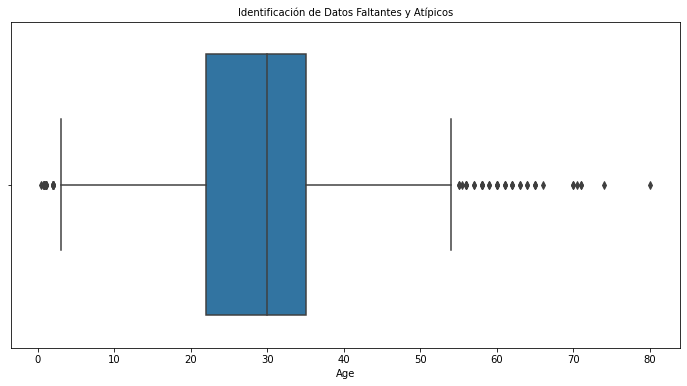

In [84]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(12, 6))
sns.boxplot(x=datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [ ]:
Segun la grafica se evidencian varios registros con valores atipicos que realemente no trataré como atipicos puesto que las edades
pueden ser iguales a las que se señalan ( observo  varios bebés y varios mayores de 55 años ) por tal motivo solo  mostraré 
los datos de los pasajeros que se encuentran por fuera de los bigotes del diagrama de caja.

In [88]:
nivel_minimo = 1
nivel_maximo = 80
atipicos = datos[(datos['Age'] < nivel_minimo) | (datos['Age'] > nivel_maximo)]
Total_Atipicos = atipicos.shape[0]
print("El total de datos atípicos es {}".format(Total_Atipicos))
print("Los PassengerId con valores atípicos y sus edades son:")
print(atipicos[['PassengerId','Name', 'Age']])

El total de datos atípicos es 7
Los PassengerId con valores atípicos y sus edades son:
     PassengerId                             Name   Age
78            79    Caldwell, Master. Alden Gates  0.83
305          306   Allison, Master. Hudson Trevor  0.92
469          470    Baclini, Miss. Helene Barbara  0.75
644          645           Baclini, Miss. Eugenie  0.75
755          756        Hamalainen, Master. Viljo  0.67
803          804  Thomas, Master. Assad Alexander  0.42
831          832  Richards, Master. George Sibley  0.83


Realizo conteo segun el sexo y puerto de embarque 

In [78]:
conteo_sexo = datos['Sex'].value_counts()
conteo_embarque = datos['Embarked'].value_counts()

print("Cantidad de hombres y mujeres:")
print(conteo_sexo)

print("\nCantidad de personas que embarcaron según el puerto:")
print(conteo_embarque)

Cantidad de hombres y mujeres:
male      577
female    312
Name: Sex, dtype: int64

Cantidad de personas que embarcaron según el puerto:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [79]:

print("Cantidad de Registros con cero en Age: ",datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Sex: ",datos['Sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Survived: ",datos['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass: ",datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en Embarked: ",datos['Embarked'].isin([0]).sum())

Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Sex:  0
Cantidad de Registros con cero en Survived:  549
Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Fare:  15
Cantidad de Registros con cero en Embarked:  0


Encuentro registros con datos en 0 en Survived y Fare , para este caso no  se eliminaran los registros que poseen
0 en Fare puesto que pueden ser invitados a la embarcacion. No se omiten los 0 de Survived ya que este dato representa 0 si no sobrevivió. 

In [80]:
cantidad_registros = datos.shape[0]

print("La cantidad de registros en el DataFrame es:", cantidad_registros)

La cantidad de registros en el DataFrame es: 889


In [89]:
#Revision del tipo de datos y datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [90]:
# Total de personas sobrevivientes

datos['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

Para construir el modelo se eliminaran las columnas que no sean numericas en caso que no se puedan pasar referencias ( Name , Ticket)
Para los campos que se pueden tener referencias se realizaran las equivalencias 
Sex ( male = 0 , female = 1) ,  Embarked ( S = 0 , c = 1 , Q = 2 ) 

In [95]:
datos = datos.drop(columns=['Name', 'Ticket'])
datos['Sex'] = datos['Sex'].map({'male': 0, 'female': 1})
datos['Embarked'] = datos['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [96]:
from sklearn.model_selection import train_test_split

# Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%
# Se crean variables X y Y para almacenar la información del entrenamiento
X = datos.drop('Survived', axis=1)  # Se cargan los datos de train sin los datos de la columna Survived
Y = datos['Survived']  # Se cargan los datos de train con los datos de la la columna Survived

# La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [97]:
print (X_train)

     PassengerId  Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
318          319       1    1  31.000000      0      2  164.8667         0
705          706       2    0  39.000000      0      0   26.0000         0
347          348       3    1  27.745174      1      0   16.1000         0
490          491       3    0  30.726645      1      0   19.9667         0
441          442       3    0  20.000000      0      0    9.5000         0
..           ...     ...  ...        ...    ...    ...       ...       ...
837          838       3    0  30.726645      0      0    8.0500         0
193          194       2    0   3.000000      1      1   26.0000         0
630          631       1    0  80.000000      0      0   30.0000         0
560          561       3    0  30.726645      0      0    7.7500         2
685          686       2    0  25.000000      1      2   41.5792         1

[666 rows x 8 columns]


In [98]:
print (Y_train)

318    1
705    0
347    1
490    0
441    0
      ..
837    0
193    1
630    1
560    0
685    0
Name: Survived, Length: 666, dtype: int64


In [99]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
 # la funPrediccion = modelo_regresion.predict(X_test)ción predict predice los valores a partir del conjunto de datos de validación

In [26]:
print(Y_test)

111    0
150    0
12     1
216    1
139    0
      ..
27     0
218    0
256    0
37     0
92     0
Name: condition, Length: 75, dtype: int64


In [28]:
print (Prediccion)

[0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0
 0]


In [104]:

print("Número de 0's:", np.sum(Prediccion == 0))
print("Número de 1's:", np.sum(Prediccion == 1))

Número de 0's: 142
Número de 1's: 81


In [105]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       132
           1       0.73      0.65      0.69        91

    accuracy                           0.76       223
   macro avg       0.75      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



Segun el desempeño se puede ver lo siguiente:
    Precision: ( Proporcion de verdaderos positivos )    0= No sobrevivio : 0.77   ( 77% de efectividad de la predicion para 
   los pasajeros que no sobrevivieron) 1= No sobrevivio : 0.73 ( 73% en efectividad de la predicion para los pasajeros 
   que sobrevivieron).
   
   Recall : ( Sensibilidad o tasa de verdaderos positivos) el modelo identificó correctamente el 83 %  de los ejemplos de Survived = 0 ( No sobrevivio) y el 65 % de los ejemplos de  Survived = 1 . 
   F1-Score = (Media armonica de la precision y el recall)  medida util cuando las clases se encuentran desbalanceadas  0= 0.80    1 = 0.69
   Acurrancy : ( Exactitud)  La precision globlal del modelo indica que el 76% de las predicciones fueron correctas
   

Como conclusiones tenemos : 

La exactitud generl del modelo es de 76%  que aunque es un desempeño aceptable se tiene un margen de mejora.
El modelo ha tenido un mejor desempeño para la clase 0 (No sobreviviente) con una precicion de 0.77 y recall de 0.83 .


Con la matriz de confucion podemos visualizar la prediccion frente a la verdad .

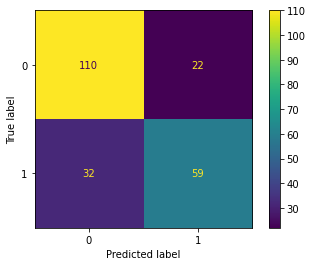

In [106]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
Se puede observar que mientras el porcentaje de prediccion en los Survived = 0  fue de 110 aciertos contra 32 errores  
para los Survived= 1 fue 59 aciertos contra 22 errores  . En sintesis el modelo puede mejorar en la clase Survived = 1.